In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv')
values = values.merge(labels)

Text(0, 0.5, 'Cantidad de edificaciones')

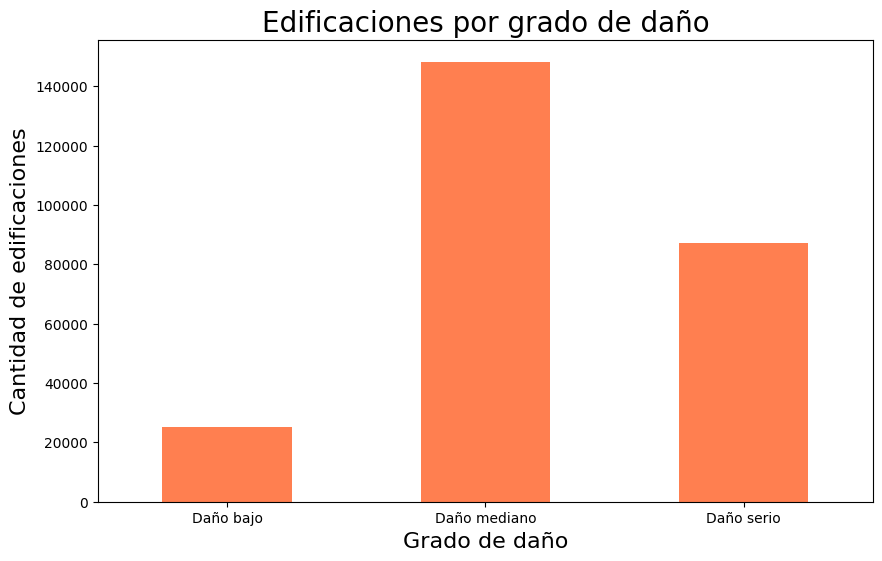

In [3]:
damage_grade_counts = values.damage_grade.value_counts()
# Ordeno y renombro los damage grades
damage_grade_counts = damage_grade_counts[[1, 2, 3]]
damage_grade_counts = damage_grade_counts.rename({1:'Daño bajo',
                                                  2:'Daño mediano',
                                                 3: 'Daño serio'})
g = damage_grade_counts.plot(kind='bar', linewidth=150, 
                         color='coral',figsize=(10,6), rot=0)
g.set_title('Edificaciones por grado de daño', fontsize=20)
g.set_xlabel('Grado de daño', fontsize=16)
g.set_ylabel('Cantidad de edificaciones', fontsize=16)

Text(220.72222222222223, 0.5, 'id de la region geográfica nivel 2 (agrupado)')

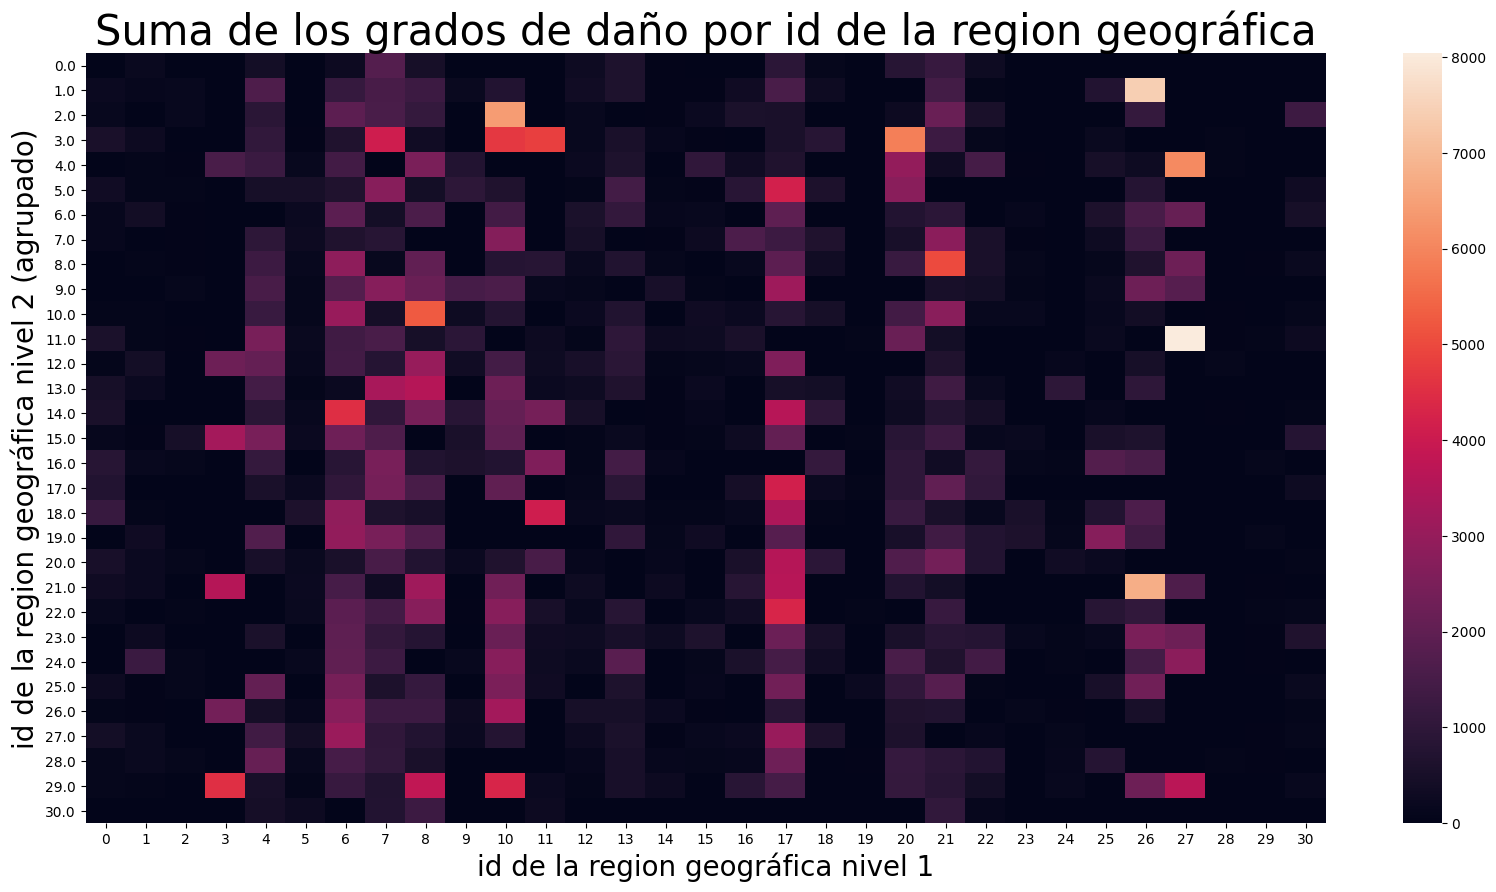

In [4]:
# Agrupo los valores de geo_level_2_id en 30 para que el grafico
# quede mas prolijo
values['geo_level_2_id_agrupados'] = round(values.geo_level_2_id / 48)
for_heatmap = values.pivot_table(index='geo_level_2_id_agrupados', 
                                 columns='geo_level_1_id', 
                                 values='damage_grade',
                                 aggfunc='sum')
for_heatmap = for_heatmap.fillna(0)
g = sns.heatmap(for_heatmap)
g.set_title("Suma de los grados de daño por id de la region geográfica",
            fontsize=30)
g.set_xlabel("id de la region geográfica nivel 1",fontsize=20)
g.set_ylabel("id de la region geográfica nivel 2 (agrupado)", fontsize=20)

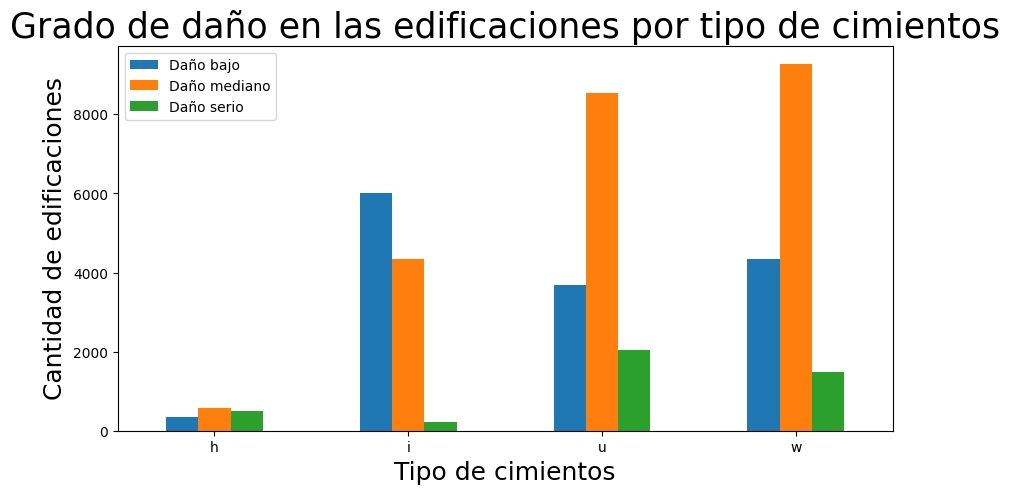

In [5]:
a = values[['damage_grade', 'foundation_type', 'geo_level_1_id']]
a = a.groupby(['damage_grade', 'foundation_type']).count()
a = a.unstack(0)
# Separo el tipo de cimiento r porque tiene una escala muy distinta a 
# las de los demas
g = a.loc[['h', 'i', 'u', 'w'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

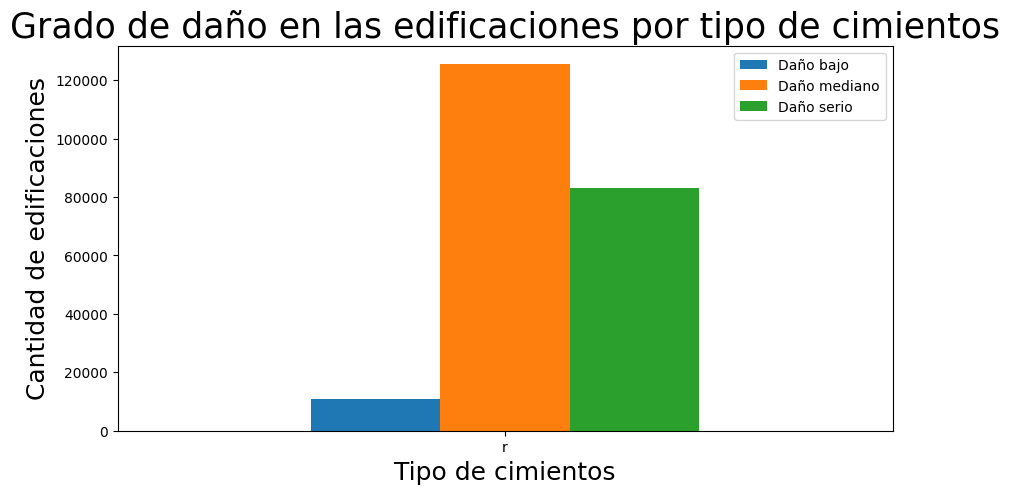

In [6]:
g = a.loc[['r'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

Concluciones los 2 graficos de arriba:
El tipo de fundacion 'i' es el unico que tiene una mayor cantidad de edificaciones con bajo daño que con los otros grados de daño. En los demas tipos de fundacion predomina el daño medio, que, como puede verse en el grafico de edificaciones por grado de daño, es el que predomina en general. Tambien, hay proporcionalmente muchas menos edificaciones de este tipo que recibieron daño serio. En este sentido, se puede decir que el tipo de fundacion 'i' tendio a ser el mas efectivo para mitigar el daño.

Ademas se puede ver que los tipos de fundacion 'u' y 'w' tienen distribuciones similares de los grados de daño, por lo que se puede decir que sus efectividades para mitigar el daño son similares

In [7]:
# Me quedo solo con las edificaciones con daño bajo o serio para 
# hacer comparaciones entre ambas
danio_bajo_y_serio = values.loc[values.damage_grade != 2]

In [8]:
superstructure_bools = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other']

titulos = [
    'adobe - barro',
    'barro - piedra', 
    'piedra',
    'cemento - piedra',
    'barro-ladrillos',
    'cemento - ladrillos',
    'Timber',
    'Bambú (caña)',
    'concreto reforzado no-diseñado',
    'concreto reforzado diseñado',
    'otro material'
]

In [9]:
def calcular_porcentaje_bools (x):
    return (np.mean(x)*100)
porcentajes_para_graficar = danio_bajo_y_serio\
            .pivot_table(index='damage_grade',
                values=superstructure_bools,
                    aggfunc=calcular_porcentaje_bools)
porcentajes_para_graficar = porcentajes_para_graficar\
                        .rename({1:'Daño bajo', 3: 'Daño serio'})
porcentajes_para_graficar

has_superstructure_adobe_mud  has_superstructure_bamboo  \
damage_grade                                                            
Daño bajo                         2.364273                  11.299952   
Daño serio                        9.866083                   6.092779   

              has_superstructure_cement_mortar_brick  \
damage_grade                                           
Daño bajo                                  28.279733   
Daño serio                                  1.248595   

              has_superstructure_cement_mortar_stone  \
damage_grade                                           
Daño bajo                                   3.299634   
Daño serio                                  0.773923   

              has_superstructure_mud_mortar_brick  \
damage_grade                                        
Daño bajo                                2.479701   
Daño serio                               6.237245   

              has_superstructure_mud_mortar_stone  has_superstructure_other  \
damage_grade                                                                  
Daño bajo                               34.867059                  2.611049   
Daño serio                              86.970579                  1.147699   

              has_superstructure_rc_engineered  \
damage_grade                                     
Daño bajo                            10.571565   
Daño serio                            0.085991   

              has_superstructure_rc_non_engineered  \
damage_grade                                         
Daño bajo                                15.351855   
Daño serio                                1.616639   

              has_superstructure_stone_flag  has_superstructure_timber  
damage_grade                                                            
Daño bajo                          0.724407                  30.417131  
Daño serio                         4.851063                  21.349951

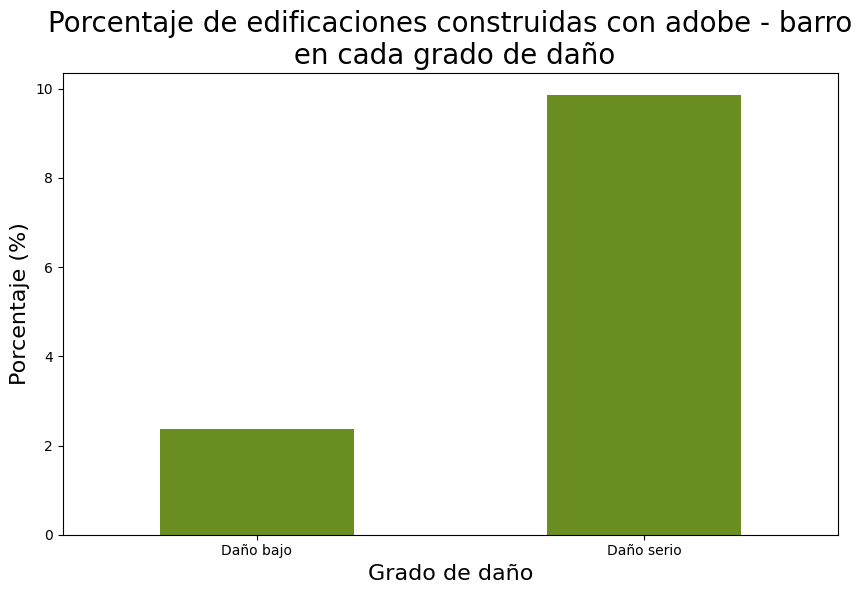

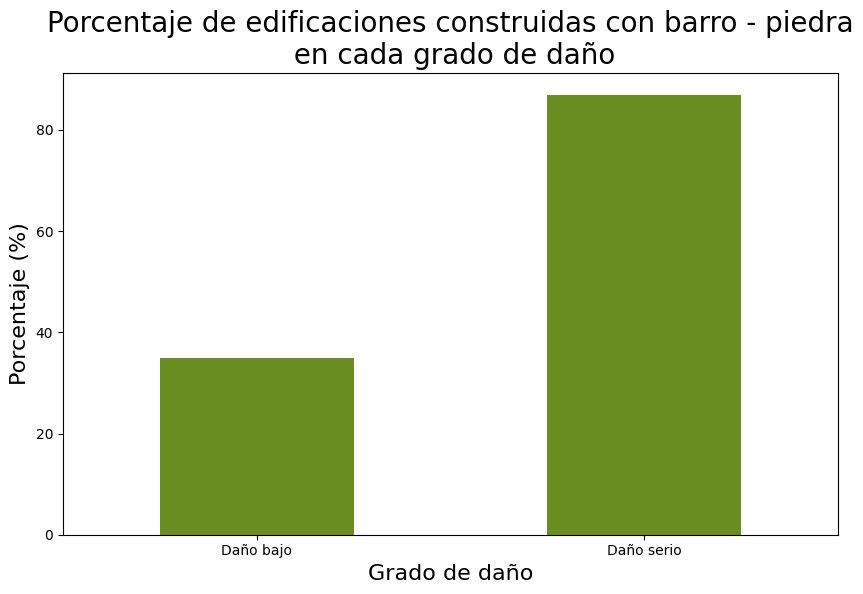

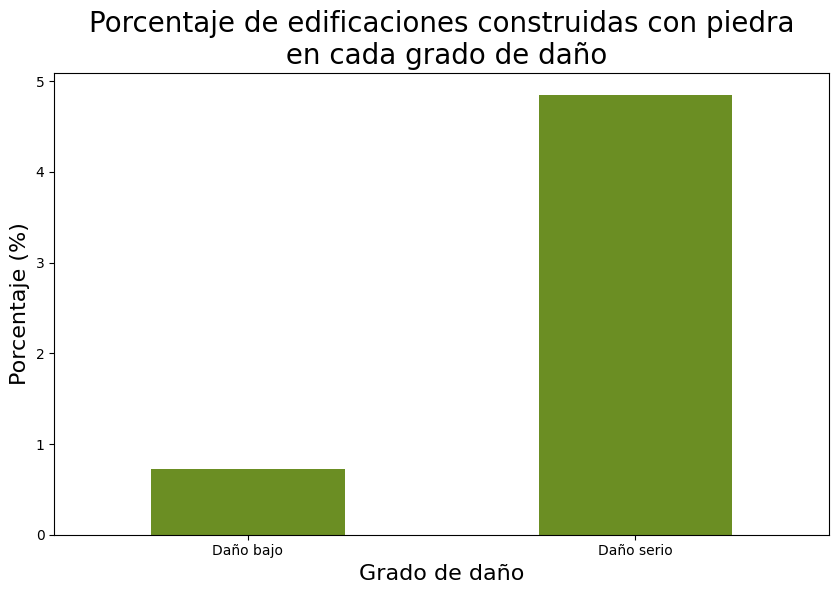

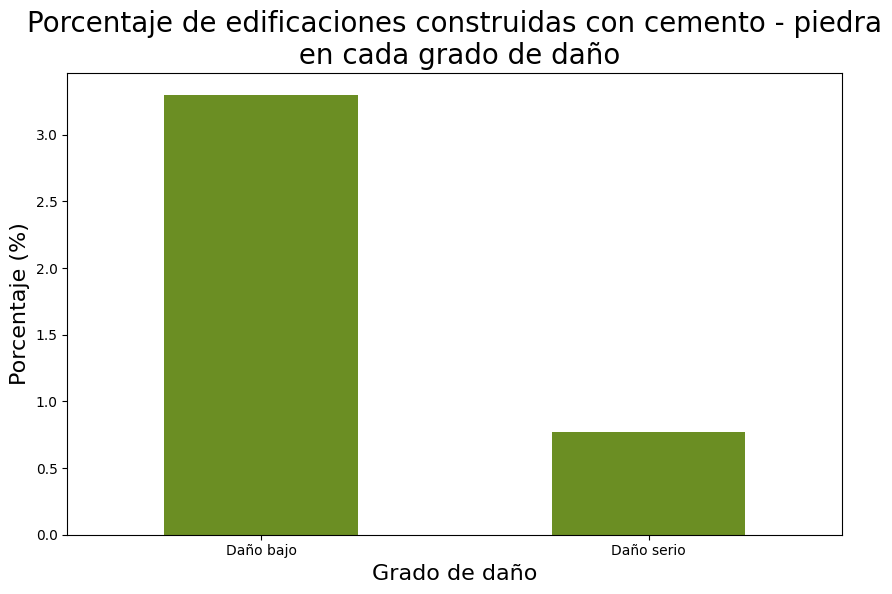

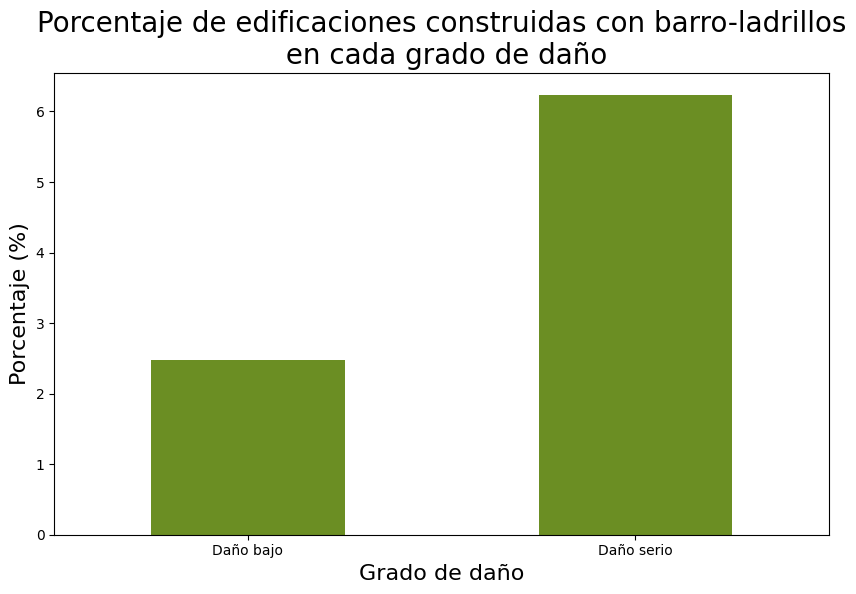

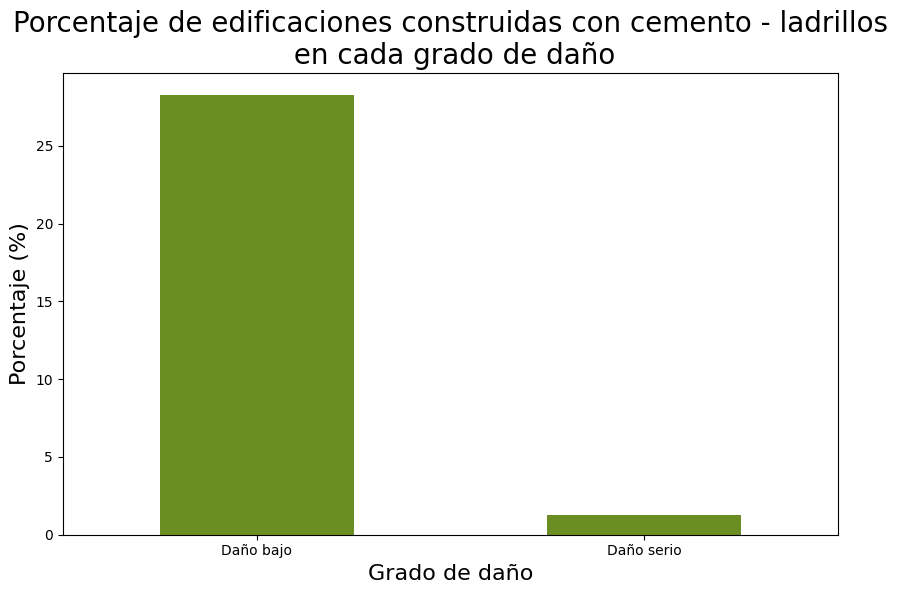

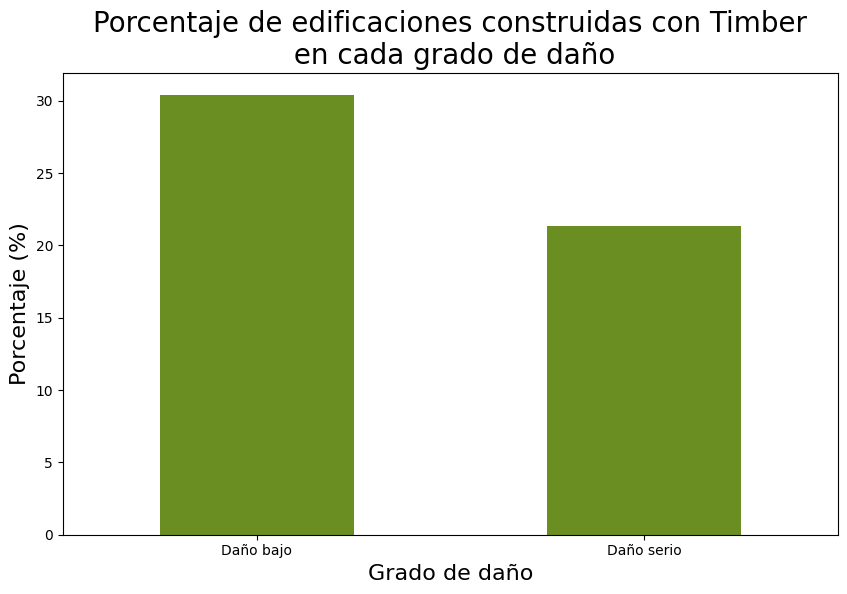

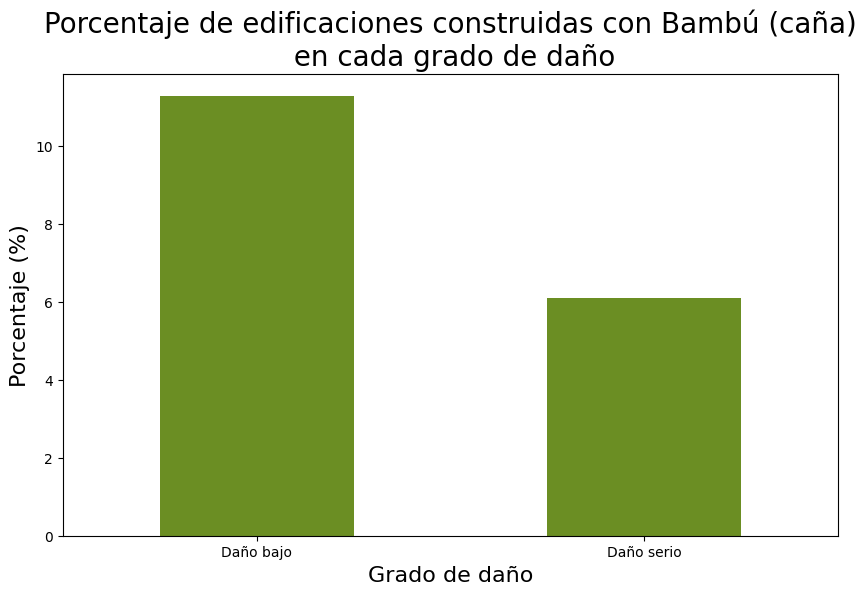

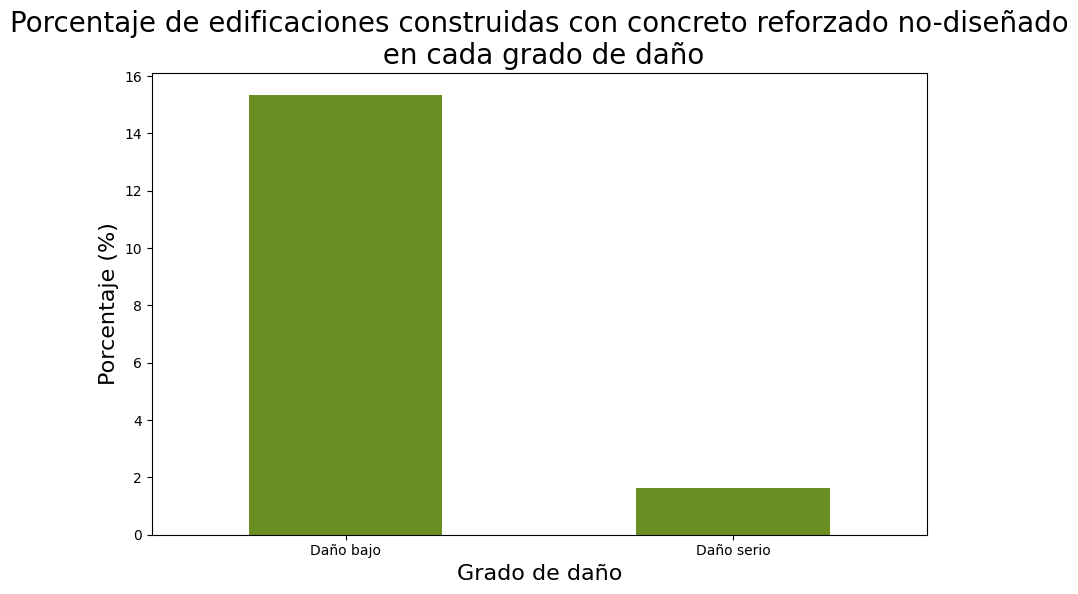

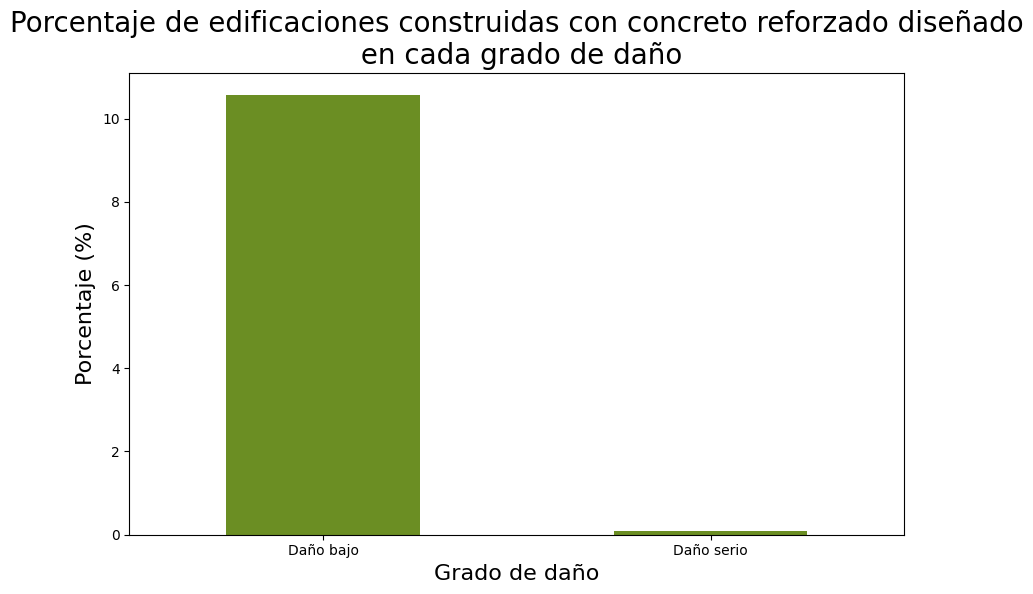

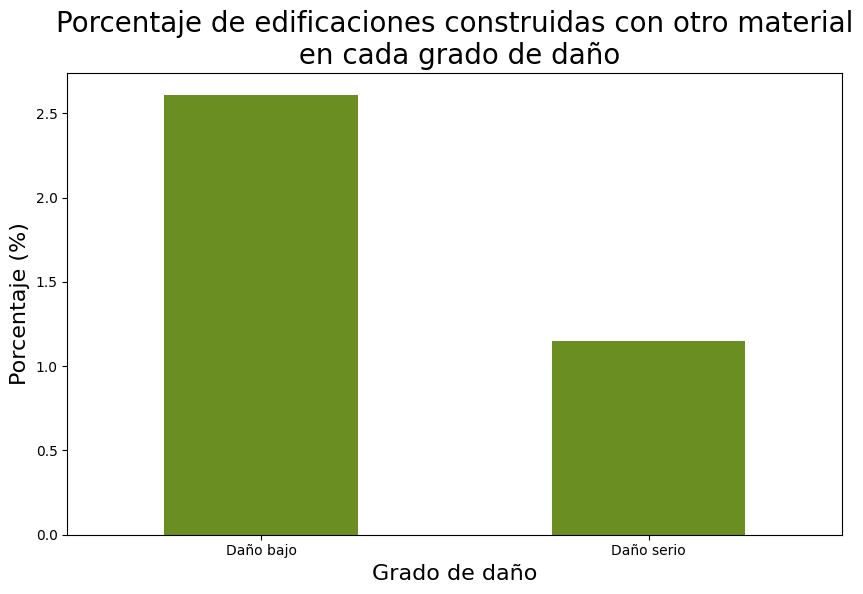

In [10]:
for i in range (0,len(superstructure_bools)):
    g = porcentajes_para_graficar.loc[:,superstructure_bools[i]]\
    .plot(kind='bar', linewidth=150, 
                         color='olivedrab',figsize=(10,6), rot=0)
    g.set_title('Porcentaje de edificaciones construidas'
            ' con ' + titulos[i] + '\n en cada grado de daño'
            , fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.show()

Conclusiones barro-piedra: 
En este grafico se puede apreciar que mientras que es muy comun que las edificaciones que recibieron daños serios hayan sido construidas con barro-piedra (87%), no lo es tanto para las edificaciones que presentan un bajo nivel de daños (35%). De esto se puede concluir que las construcciones de este tipo no tendieron a mitigar bien los daños.

Conclusiones cemento - ladrillos: En este caso se puede ver que en las edificaciones que recibieron un bajo nivel de daños, es mucho mas comun que hayan sido construidas con cemento - ladrillos que en las que recibieron daños serios (28% contra 1%). De esto se puede concluir que este tipo de construcciones ayudo a mitigar los daños.

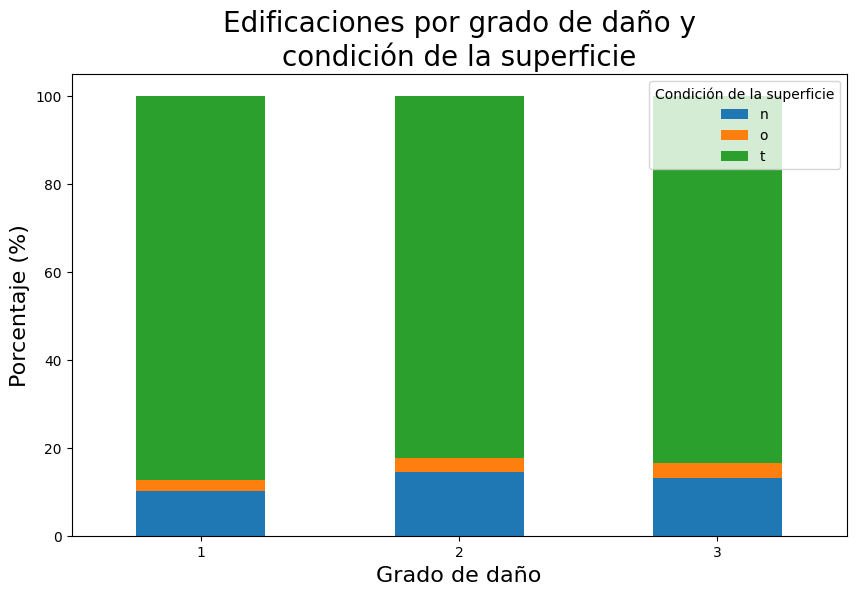

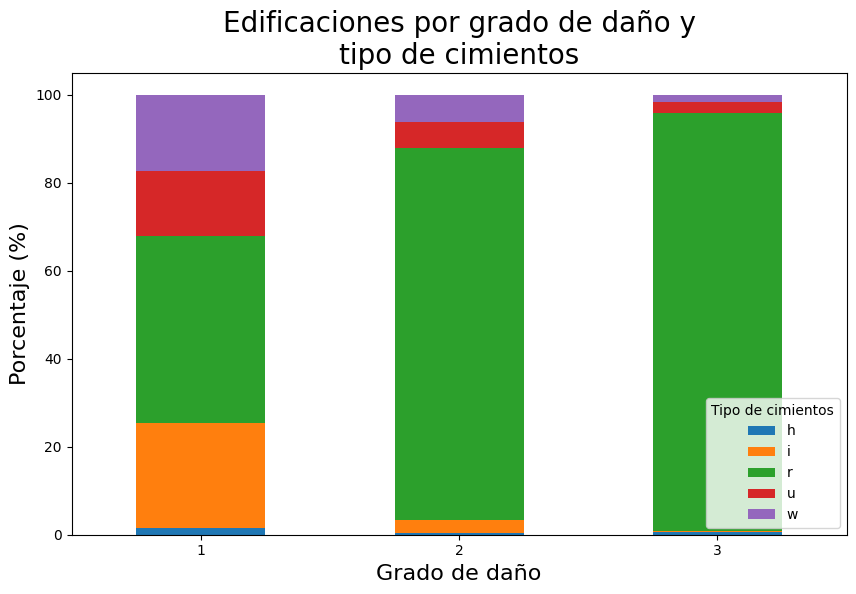

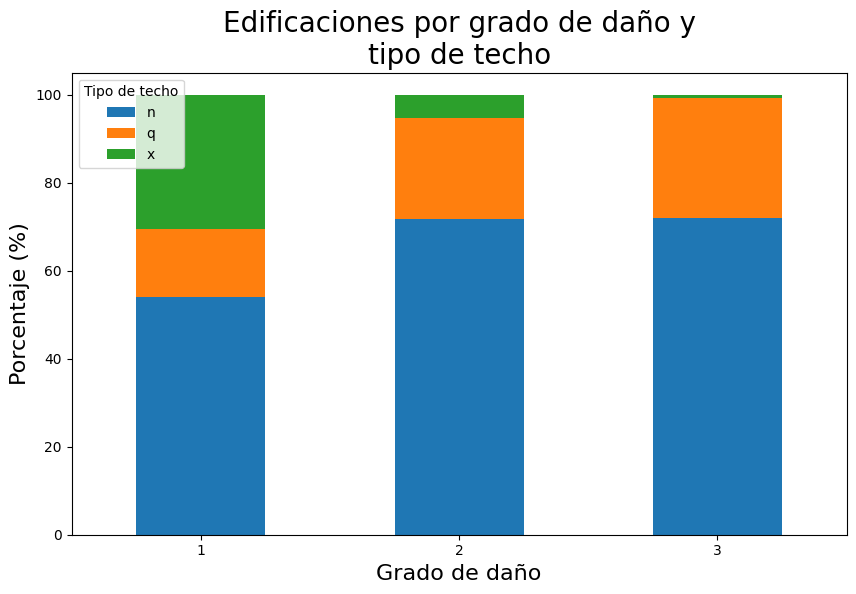

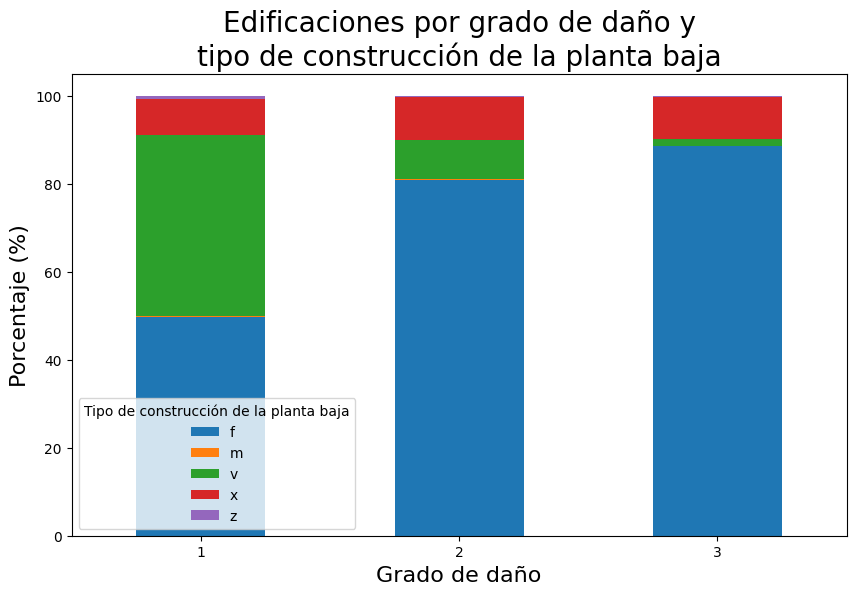

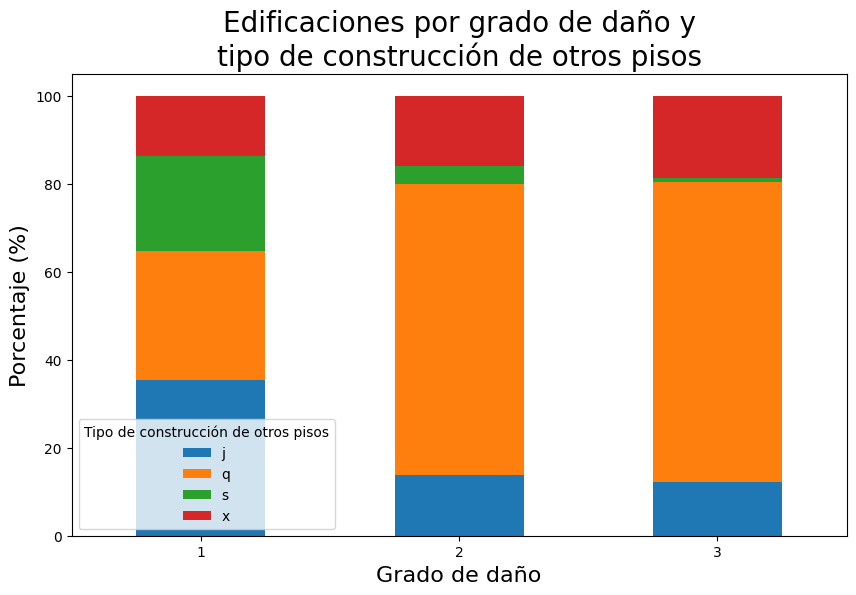

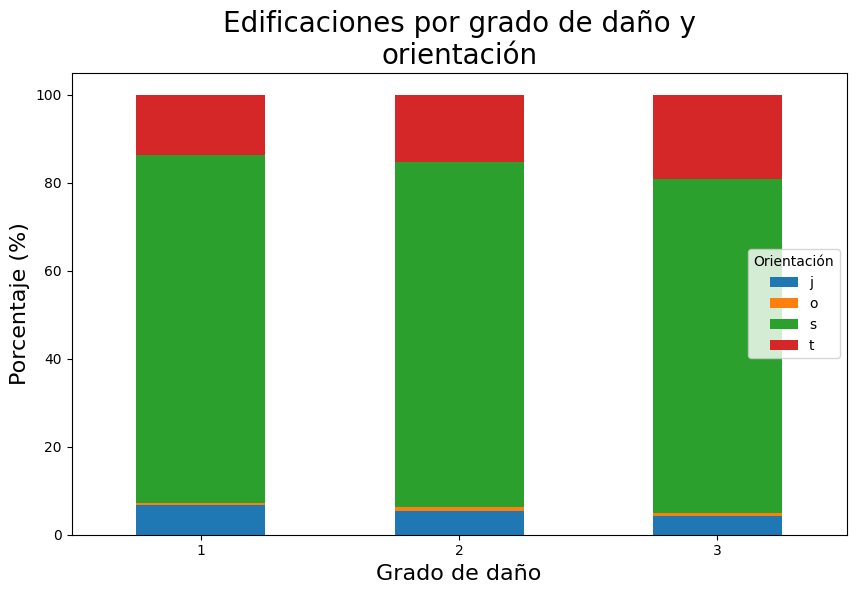

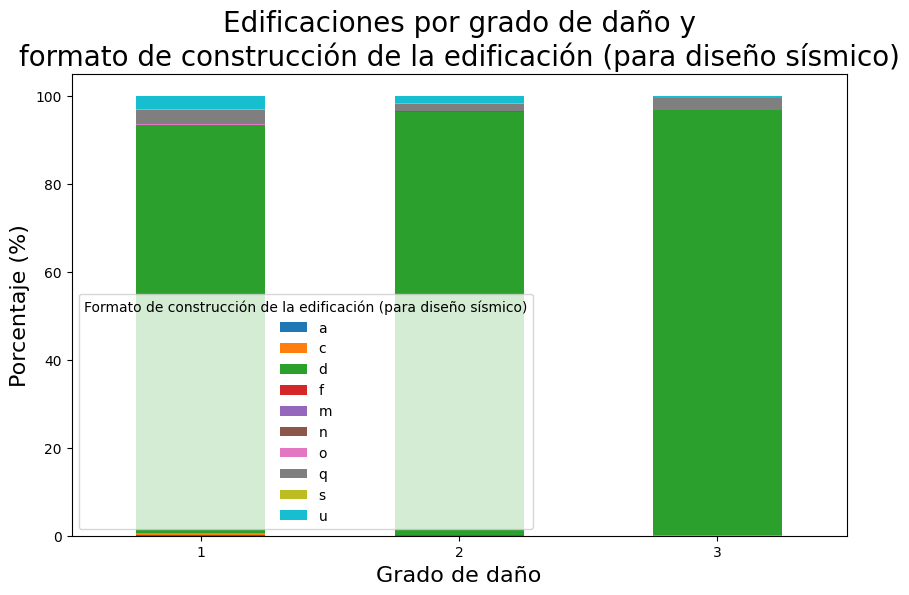

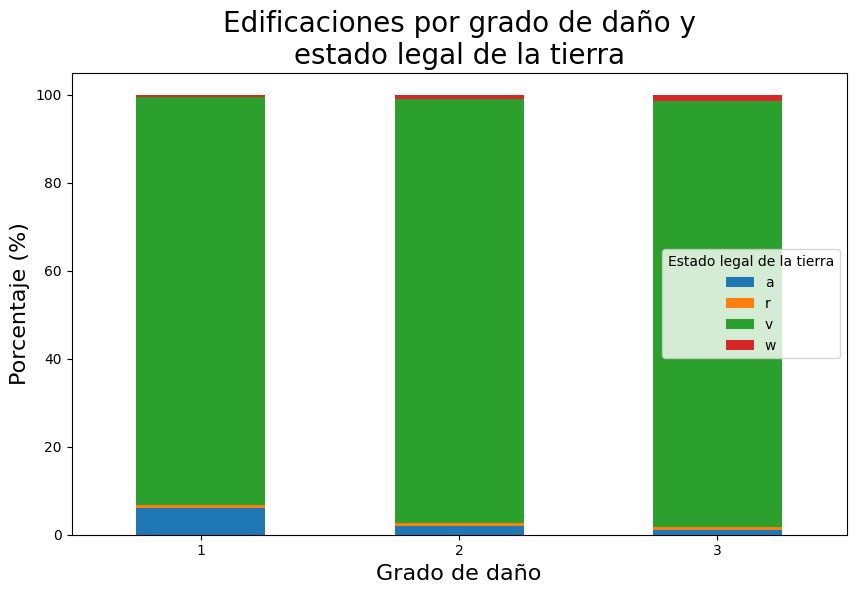

In [11]:
def graficarPorcentajesDeCategoricos(serie, titulo):
    serie = serie.value_counts(normalize=True) * 100
    g = serie.unstack(1).plot(kind='bar', stacked=True,
                              rot=0, figsize=(10,6))
    g.set_title('Edificaciones por grado de daño y\n' + titulo,
               fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.legend(title=titulo.capitalize())
    plt.show()

agrupados = values.groupby('damage_grade')

graficarPorcentajesDeCategoricos(agrupados.land_surface_condition, 
                'condición de la superficie')
graficarPorcentajesDeCategoricos(agrupados.foundation_type, 
                                  'tipo de cimientos')
graficarPorcentajesDeCategoricos(agrupados.roof_type, 
                                  'tipo de techo')
graficarPorcentajesDeCategoricos(agrupados.ground_floor_type, 
            'tipo de construcción de la planta baja')
graficarPorcentajesDeCategoricos(agrupados.other_floor_type, 
            'tipo de construcción de otros pisos')
graficarPorcentajesDeCategoricos(agrupados.position, 
                                  'orientación')
graficarPorcentajesDeCategoricos(agrupados.plan_configuration, 
    'formato de construcción de la edificación (para diseño sísmico)')
graficarPorcentajesDeCategoricos(agrupados.legal_ownership_status, 
                            'estado legal de la tierra')

## ¿Cuales fueron las regiones geograficas mas y menos dañadas?

Para responder esta pregunta utilizamos dos criterios, que se diferencian en lo que se entiende por region geografica. Para el primer caso tomamos como de una misma region a todos los que comparten el geo_level_1_id y para el segundo a todos los que comparten los 3 ids de la region. En ambos casos para realizar el analisis nos quedamos solo con las regiones que contenian al menos una cierta cantidad de edificaciones, para disminuir el desvio standar de la muestra. 

En ambos casos el dato que evaluamos fue el grado de daño (coinciderandolo como un numero) y nos quedamos con los que tenian un promedio mayor o igual 2.75 (lo que querria decir que los daños en la zona fueron severos) o menor o igual a 1.25 (lo que querria decir que la zona no fue tan impactada) y una desviacion standar menor o igual 0.5, para garantizar que el promedio sea representativo de las edificaciones que estan en la zona. Para el caso en el que definimos una zona como los que comparten el geo_level_1_id nos quedamos con las zonas de al menos 5000 edificaciones y para el otro caso nos quedamos con las zonas de al menos 100 edificaciones.

In [3]:
a = values.groupby('geo_level_1_id')['damage_grade']\
    .agg(['count', 'std', 'mean'])
a.loc[(a['count']>=5000) & (a['std']<= 0.5) & 
      ((a['mean'] >= 2.75) |  (a['mean']<= 1.25))]

count       std     mean
geo_level_1_id                          
17              21813  0.435225  2.79448

In [4]:
a = values.groupby(['geo_level_1_id', 'geo_level_2_id',
                    'geo_level_3_id'])['damage_grade']\
    .agg(['count', 'std', 'mean'])
a.loc[(a['count']>=100) & (a['std']<= 0.5) & 
      ((a['mean'] >= 2.75) |  (a['mean']<= 1.25))]

count       std      mean
geo_level_1_id geo_level_2_id geo_level_3_id                           
3              720            6460              107  0.415491  2.841121
               1006           5957              120  0.222035  2.966667
6              1253           3073              172  0.404987  1.186047
10             87             2755              117  0.447510  2.820513
17             421            4900              127  0.379614  2.850394
               682            1743              117  0.130179  2.982906
               1080           4391              143  0.478536  2.804196
                              6609              111  0.413530  2.783784
21             363            3485              126  0.432417  2.753968
                              4982              107  0.443810  2.803738
                              12093             111  0.378367  2.828829
26             39             1324              100  0.368453  1.160000
27             1155           7851              108  0.135445  2.981481